### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [12]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Step 9. Multiple Variable Linear Regression

Loading the multi-variable linear regression model for testing

In [13]:
filename = 'LinearRegression_Models/A/A_MV_model_v6.sav'
model_C = pickle.load(open(filename, 'rb'))

Opening and parsing the test data CSV file, with the specific input features collected

In [14]:
mx_col = ['num_bed', 'num_bath', 'property_size', 'value_score', 'tot_rooms', 'suburb_median_income']
testing_data = pd.read_csv('A_testing_data/A_testing_data_new_2.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

#### Step 10

- Individually plotting test data features, targets and predictions from the model, on a graph for each input feature, with the purpose of visually evaluating the accuracy of the model

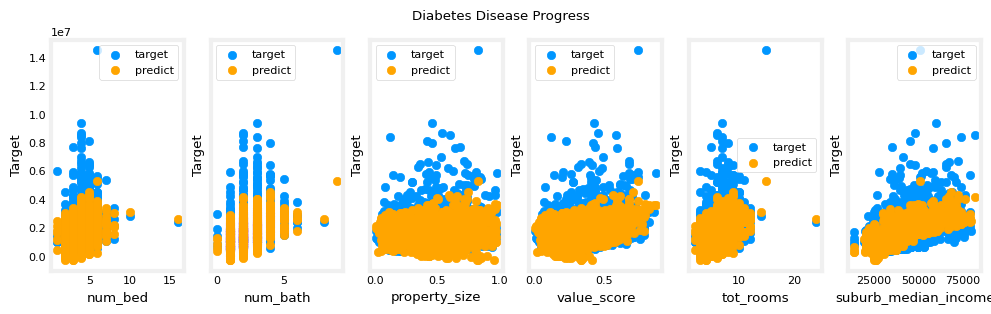

In [15]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

#### Step 11

- Predict the score

In [16]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.46264210405699413


- This is a reasonable score, though already higher than polynomial and linear regression algorithms, there are improvements which can be made, such as adding additional and more applicable features

#### Step 11

- You can do predictions to get a feel for the model

In [17]:
print(model_C.predict([[0.1,0.1,0.1, 0.1, 0.1, 0.1]]))

[-452234.18129599]


#### Step 12 

- Manually calculating the loss and cost of the model using testing data

In [18]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

      num_bed  num_bath  property_size  value_score  tot_rooms  \
0         3.0       1.0       0.317073     0.252175        4.0   
1         4.0       2.0       0.558537     0.456788        6.0   
2         4.0       1.0       0.494309     0.362359        5.0   
3         3.0       1.0       0.646341     0.351823        4.0   
4         4.0       2.0       0.252033     0.163171        6.0   
...       ...       ...            ...          ...        ...   
2329      4.0       2.0       0.247154     0.211081        6.0   
2330      3.0       1.0       0.520325     0.361874        4.0   
2331      4.0       2.0       0.096748     0.091653        6.0   
2332      4.0       3.0       0.419512     0.346635        7.0   
2333      5.0       2.0       0.568293     0.443210        7.0   

      suburb_median_income   Target  Predicted result       Cost  
0                  26208.0   650000      8.850096e+05 -235009.63  
1                  37700.0  1290000      1.996080e+06 -706080.19  
2     

Shows the x axis intercepts, which are the values when inputs are 0 and the coefficients which is the influence a feature has on the prediction

In [20]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -738730.2454485034
Coefficient: [-1.16302811e+05  2.05369475e+05 -3.27638945e+06  5.96318067e+06
  8.90666641e+04  3.60997106e+01]


- The differences in coefficients illuminate how the different input features  influence the model, features like value_score have a high coefficient meaning they have a large influence on the model prediction, while others have quite low predicitons or even negative ones